# Color Spaces

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

In [2]:
imgurl = 'https://upload.wikimedia.org/wikipedia/commons/3/33/HSV_color_solid_cylinder_saturation_gray.png'
filename = 'saved_file.jpg'

## imageio
- https://imageio.readthedocs.io/en/stable/index.html

In [3]:
import imageio

imio = imageio.imread (imgurl)

imageio.imread():  <class 'imageio.core.util.Array'>  a subclass of np.ndarray


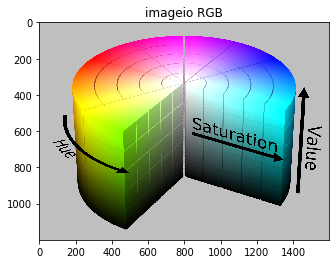

In [4]:
print ('imageio.imread(): ', type(imio), ' a subclass of np.ndarray')
#print ('meta: ', imio.meta)
plt.imshow (imio)
plt.title ('imageio RGB')
plt.pause(2)

## min-max function

In [5]:
def minmax(a):
    if len(a.shape) == 2:
        return a.flatten().min(), a.flatten().max()
    elif len(a.shape) == 3:
        return [ minmax(a[:,:,i]) for i in range(3)]

### get numpy array 
not necessary, could be done without explicit conversion

In [6]:
rgb = np.asarray (imio)
rgb.dtype, rgb.shape, minmax(rgb)

(dtype('uint8'), (1200, 1600, 3), [(0, 255), (0, 255), (0, 255)])

- Color conversion assumes input data normalized to [0,1]
- 32 bit only for opencv

In [7]:
frgb = rgb / 255.
frgb = frgb.astype(np.float32)
frgb.dtype

dtype('float32')

In [8]:
minmax(frgb), minmax(rgb)

([(0.0, 1.0), (0.0, 1.0), (0.0, 1.0)], [(0, 255), (0, 255), (0, 255)])

## opencv
https://docs.opencv.org/4.1.1/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab

In [9]:
import cv2 as cv

In [10]:
hsv_cv = cv.cvtColor (frgb, cv.COLOR_RGB2HSV)

In [11]:
hsv_cv.shape, minmax

((1200, 1600, 3), <function __main__.minmax(a)>)

HUE is in range [0,360)

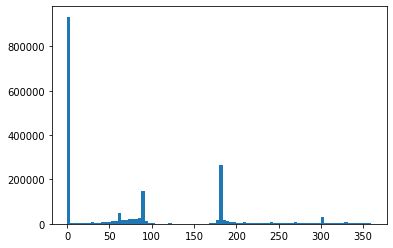

In [12]:
h = plt.hist(hsv_cv[:,:,0].flatten(), bins=90)

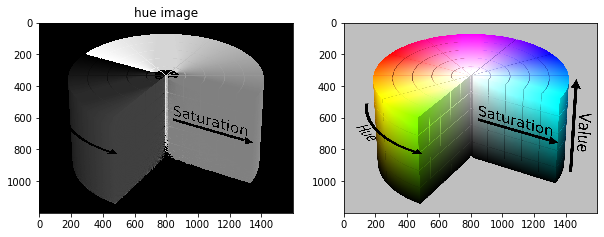

In [13]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow (hsv_cv[:,:,0] * 255 / 360., cmap='gray')
axes[0].set_title('hue image')
axes[1].imshow (rgb)

## skimage

In [14]:
import skimage

In [15]:
hsv = skimage.color.rgb2hsv (rgb)
hsv.shape, hsv.dtype, minmax(hsv)

((1200, 1600, 3),
 dtype('float64'),
 [(0.0, 0.9993464052287582), (0.0, 1.0), (0.0, 1.0)])

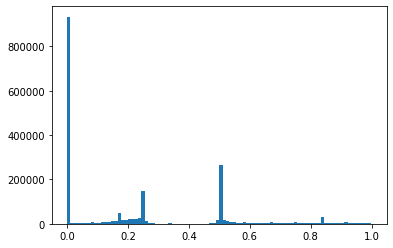

In [16]:
h = plt.hist (hsv[:,:,0].flatten(), bins=90)

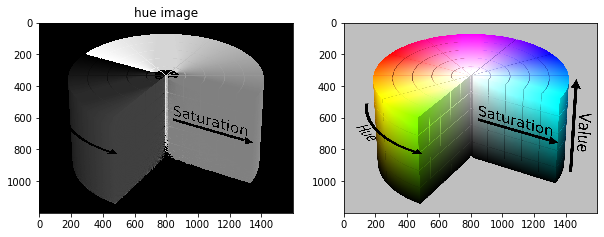

In [17]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow (hsv[:,:,0], cmap='gray')
axes[0].set_title('hue image')
axes[1].imshow (rgb)

* skimage convert rgb to hsv in [0,1] range each

## Color circulation

((650, 650, 3), dtype('uint8'))

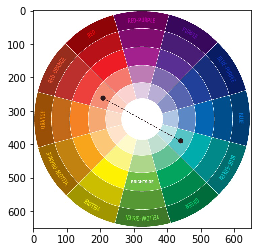

In [18]:
ccurl='https://files.brightside.me/files/news/part_9/92405/533505-colour6-650-a542d8629a-1476252429.jpg'
#ccurl = 'https://upload.wikimedia.org/wikipedia/commons/d/d9/Moses_Harris%2C_The_Natural_System_of_Colours.jpg'
rgb = imageio.imread (ccurl)
plt.imshow (rgb)
rgb.shape, rgb.dtype

In [19]:
hsv = skimage.color.rgb2hsv (rgb)

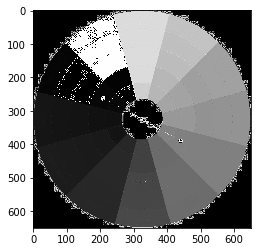

In [20]:
plt.imshow (hsv[:,:,0], cmap='gray')

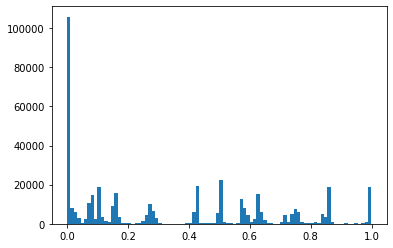

In [21]:
h = plt.hist (hsv[:,:,0].ravel(), bins=90)

In [22]:
hsvnew = hsv.copy()

In [23]:
hnew = hsv[:,:,0] + 0.5 # color shift 180

In [24]:
hnew.max()

1.4992690058479532

Circulation

In [25]:
for r in range (hsv.shape[0]):
    for c in range (hsv.shape[1]):
        if hnew[r,c] > 1.:
            hnew[r,c] -= 1.

In [26]:
hnew.max()

1.0

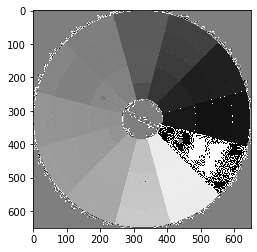

In [27]:
plt.imshow (hnew, cmap='gray')

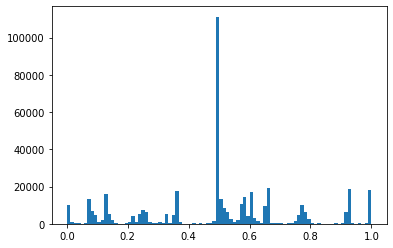

In [28]:
h = plt.hist (hnew.ravel(), bins=90)

In [29]:
hsvnew[:,:,0] = hnew

In [30]:
rgbnew = skimage.color.hsv2rgb (hsvnew)

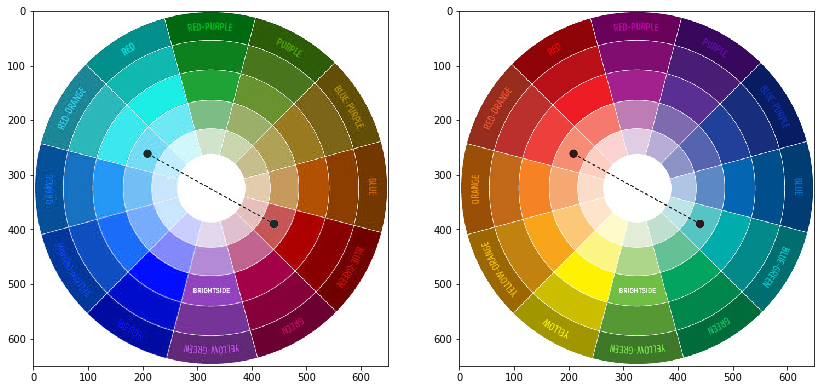

In [31]:
fig, axes = plt.subplots(1,2,figsize=(14,7))
axes[0].imshow (rgbnew)
axes[1].imshow (rgb)

In [32]:
rgbnewcv = (rgbnew*255).astype(np.uint8) 

In [33]:
cv.imshow("window", rgbnewcv)
cv.waitKey(1000)
cv.destroyWindow('window')

In [34]:
cv.destroyAllWindows()

In [35]:
def hcirc (h):
    for r in range (h.shape[0]):
        for c in range (h.shape[1]):
            if h[r,c] > 1.:
                h[r,c] -= 1.

In [36]:
steps = np.linspace (0,2,20)
for step in steps:
    hnew = hsv[:,:,0] + step
    hcirc (hnew)
    hsvnew[:,:,0] = hnew
    rgbnewcv = ( skimage.color.hsv2rgb(hsvnew) * 255. ).astype(np.uint8)
    cv.imshow("window", rgbnewcv)
    cv.waitKey(100)

In [37]:
try: 
    cv.destroyWindow('window')    
except:
    pass